In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle

In [3]:
test_data=pd.read_csv("test-public.txt",sep='\t')

In [4]:
test_data

,Id,Source,Sink
0,1,3563811,3600160
1,2,2052043,1401960
2,3,4517994,1690636
3,4,1660006,4349447
4,5,581111,1882617
...,...,...,...
1995,1996,1461386,2341683
1996,1997,4057755,1871227
1997,1998,4242514,1413468
1998,1999,555531,1290080


In [5]:
train_data=pd.read_csv("train.txt", delimiter=",", header=None,names=['Neighbours'],index_col=False)

In [6]:
train_data['ID']=train_data['Neighbours'].apply(lambda x: x.split('\t')[0])  # Get the ID

In [7]:
train_data['Neighbours']=train_data['Neighbours'].apply(lambda x: x.split('\t')[1:])# set up the neighbours

In [8]:
train_data=train_data[["ID","Neighbours"]] # set "ID" as the index

In [9]:
num_source=train_data.shape[0]
sink=train_data.iloc[0,]
len_sink=len(sink)
train_data

,ID,Neighbours
0,540762,"[1912140, 1537559, 3091331, 2757277, 3237295, ..."
1,2129843,"[65840, 3414168, 4523797, 2851163, 4321895, 13..."
2,3361377,"[955840, 3342058, 1536902, 1850727, 1504632, 1..."
3,1199298,"[2300061, 2635670, 2803600, 744722, 881446, 28..."
4,1392121,"[3845572, 546016, 4361302, 678461, 4294597, 24..."
...,...,...
19995,585576,"[660302, 3279973, 2094235, 2355188, 1296935, 3..."
19996,505961,"[3875645, 2148630, 4288909, 4011139, 340232, 1..."
19997,125824,"[54421, 868022, 385000, 2050130, 3446665, 2040..."
19998,896087,"[431577, 1007572, 499457, 3642500, 3734728, 28..."


In [10]:
train_source=train_data['ID'].iloc[:].values

In [11]:
test_source=test_data['Source'].iloc[:].values

In [12]:
intrainsource=[]
for i in test_source:
    if str(i) in train_source:
        intrainsource.append(1)
    else:
        intrainsource.append(0)

In [13]:
np.count_nonzero(intrainsource)

2000

In [14]:
test_sink=test_data['Sink'].iloc[:].values

In [15]:
testsinkintrainsource=[]
for i in test_sink:
    if str(i) in train_source:
        testsinkintrainsource.append(1)
    else:
        testsinkintrainsource.append(0)

In [16]:
np.count_nonzero(testsinkintrainsource)

376

In [17]:
test_data['sinkInTrainSource']=testsinkintrainsource

In [18]:
test_data

,Id,Source,Sink,sinkInTrainSource
0,1,3563811,3600160,0
1,2,2052043,1401960,0
2,3,4517994,1690636,0
3,4,1660006,4349447,0
4,5,581111,1882617,0
...,...,...,...,...
1995,1996,1461386,2341683,0
1996,1997,4057755,1871227,0
1997,1998,4242514,1413468,0
1998,1999,555531,1290080,0


In [19]:
#len(train_data['Neighbours'].iloc[0])

In [20]:
train_data['NeighboursNumber']=train_data['Neighbours'].str.len()

In [21]:
train_data

,ID,Neighbours,NeighboursNumber
0,540762,"[1912140, 1537559, 3091331, 2757277, 3237295, ...",143
1,2129843,"[65840, 3414168, 4523797, 2851163, 4321895, 13...",21
2,3361377,"[955840, 3342058, 1536902, 1850727, 1504632, 1...",764195
3,1199298,"[2300061, 2635670, 2803600, 744722, 881446, 28...",297
4,1392121,"[3845572, 546016, 4361302, 678461, 4294597, 24...",3808
...,...,...,...
19995,585576,"[660302, 3279973, 2094235, 2355188, 1296935, 3...",64
19996,505961,"[3875645, 2148630, 4288909, 4011139, 340232, 1...",539
19997,125824,"[54421, 868022, 385000, 2050130, 3446665, 2040...",45
19998,896087,"[431577, 1007572, 499457, 3642500, 3734728, 28...",219


In [22]:
train_sink=[]
for i in range(20000):
    train_sink+=train_data['Neighbours'].iloc[i]

In [23]:
from tqdm import tqdm

In [24]:
testsinkintrainsink=[]
for i in tqdm(test_sink):
    if str(i) in train_sink:
        testsinkintrainsink.append(1)
    else:
        testsinkintrainsink.append(0)

100%|██████████| 2000/2000 [02:23<00:00, 13.97it/s]


In [25]:
np.count_nonzero(testsinkintrainsink)

2000

In [26]:
len(train_sink)

24004361

In [28]:
from collections import Counter
c=Counter(train_sink)

In [30]:
c.most_common(3)

[('3361377', 4841), ('1250021', 4637), ('3402731', 3654)]

In [31]:
with open('count_followers.pickle', 'wb') as outputfile:
    pickle.dump(c, outputfile)

In [2]:
with open('11_features.txt','rb') as file:
    sample_data=pickle.load(file)

In [3]:
sample_data.head()

,Source,Sink,Label,RAI,JC,AAI,PA,Source_following,Sink_follows,Shortest_path,PageRank_Src,PageRank_Sink,Centrality_Sour,Centrality_Sink
0,1604753,3794609,1,0.000000,0.000000,0.000000,47,0.001218,0.006623,1,0.000004,0.000004,0.001558,0.000042
1,1927211,2402534,1,0.000034,0.000556,0.097141,5388,0.059641,0.019868,1,0.000008,0.000004,0.003437,0.000895
2,3438576,3589472,1,0.000000,0.000000,0.000000,2235,0.070670,0.006623,1,0.000026,0.000004,0.026769,0.000730
3,2029671,2363623,1,0.000000,0.000000,0.000000,236,0.000744,0.013245,1,0.000004,0.000004,0.021400,0.001205
4,2031305,4169107,1,0.000000,0.000000,0.000000,724,0.011739,0.013245,1,0.000004,0.000004,0.001249,0.000078


In [7]:
#type(sample_data)
sample_data.columns

Index(['Source', 'Sink', 'Label', 'RAI', 'JC', 'AAI', 'PA', 'Source_following',
       'Sink_follows', 'Shortest_path', 'PageRank_Src', 'PageRank_Sink',
       'Centrality_Sour', 'Centrality_Sink'],
      dtype='object')

In [8]:
sample_data_1=sample_data[sample_data['Label']==1]

In [10]:
sample_data_0=sample_data[sample_data['Label']==0]

,Source,Sink,Label,RAI,JC,AAI,PA,Source_following,Sink_follows,Shortest_path,PageRank_Src,PageRank_Sink,Centrality_Sour,Centrality_Sink
0,1241159,4166725,0,0.049769,0.047643,11.962959,185250,0.064953,0.629139,1,0.000004,0.000004,0.002776,0.021859
1,193736,2523520,0,0.042192,0.047643,12.275223,203010,0.064750,0.649007,1,0.000006,0.000004,0.020094,0.021746
2,1199298,2955972,0,0.000256,0.000322,0.412296,173894,0.420095,0.033113,1,0.000008,0.000004,0.002379,0.000508
3,4174165,3662667,0,0.105402,0.008917,13.150280,1132614,0.378924,0.655629,1,0.000004,0.000005,0.001315,0.022890
4,1411138,4359281,0,0.046710,0.048314,12.332327,192642,0.064175,0.635762,1,0.000004,0.000004,0.017254,0.021382


In [20]:
sample_data_1['RAI'].describe()

count    355064.000000
mean          0.005431
std           1.292779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         764.552300
Name: RAI, dtype: float64

(array([3.51692e+05, 1.71700e+03, 2.84000e+02, 1.48000e+02, 1.17000e+02,
        9.00000e+01, 9.50000e+01, 1.13000e+02, 1.80000e+01, 1.33000e+02,
        2.60000e+01, 1.20000e+01, 1.33000e+02, 2.40000e+01, 1.00000e+01,
        1.40000e+01, 1.90000e+01, 5.00000e+00, 1.50000e+02, 2.10000e+01,
        5.00000e+00, 1.60000e+01, 6.00000e+00, 4.00000e+00, 1.60000e+01,
        1.60000e+01, 4.00000e+00, 1.40000e+01, 3.00000e+00, 2.00000e+00,
        2.10000e+01, 6.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00,
        3.00000e+00]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

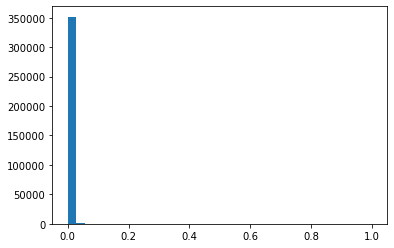

In [15]:
plt.hist(sample_data_1['RAI'],bins = int(180/5),range=(0,1))

In [21]:
sample_data_0['RAI'].describe()

count    355064.000000
mean          0.579938
std          11.482845
min           0.000000
25%           0.040609
50%           0.048913
75%           0.077801
max        1129.391475
Name: RAI, dtype: float64

(array([6.81210e+04, 1.49998e+05, 5.36070e+04, 1.97670e+04, 1.27160e+04,
        8.96500e+03, 7.07600e+03, 4.76000e+03, 3.81600e+03, 3.26300e+03,
        2.19600e+03, 1.98500e+03, 1.71700e+03, 1.36900e+03, 1.20100e+03,
        8.24000e+02, 6.83000e+02, 6.46000e+02, 6.81000e+02, 5.47000e+02,
        4.27000e+02, 4.44000e+02, 4.24000e+02, 3.12000e+02, 3.30000e+02,
        2.15000e+02, 2.59000e+02, 2.11000e+02, 1.76000e+02, 1.44000e+02,
        1.48000e+02, 1.19000e+02, 1.20000e+02, 1.19000e+02, 7.70000e+01,
        1.36000e+02]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

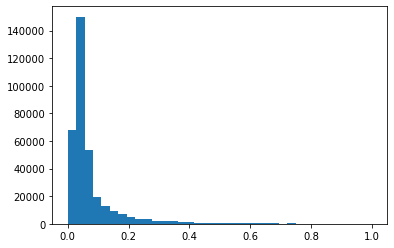

In [16]:
plt.hist(sample_data_0['RAI'],bins = int(180/5),range=(0,1))

In [22]:
sample_data_1['JC'].describe()

count    355064.000000
mean          0.011158
std           0.059358
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.989990
Name: JC, dtype: float64

(array([3.33645e+05, 3.65900e+03, 3.10600e+03, 2.86300e+03, 2.14700e+03,
        1.38800e+03, 1.36500e+03, 1.08800e+03, 9.14000e+02, 9.50000e+02,
        6.68000e+02, 4.65000e+02, 5.17000e+02, 3.15000e+02, 2.49000e+02,
        1.92000e+02, 1.71000e+02, 9.60000e+01, 2.07000e+02, 8.70000e+01,
        9.40000e+01, 7.00000e+01, 8.50000e+01, 6.80000e+01, 6.70000e+01,
        4.90000e+01, 6.90000e+01, 6.30000e+01, 6.10000e+01, 4.10000e+01,
        7.40000e+01, 7.80000e+01, 8.30000e+01, 4.50000e+01, 1.60000e+01,
        9.00000e+00]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

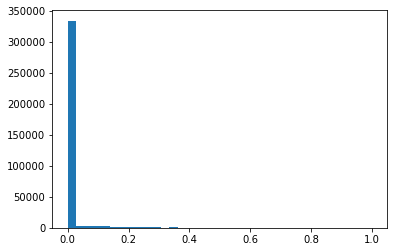

In [17]:
plt.hist(sample_data_1['JC'],bins = int(180/5),range=(0,1))

In [23]:
sample_data_0['JC'].describe()

count    355064.000000
mean          0.032583
std           0.094871
min           0.000000
25%           0.001024
50%           0.009817
75%           0.047736
max           0.996500
Name: JC, dtype: float64

(array([1.93988e+05, 1.55362e+05, 1.80000e+02, 2.00000e+00, 5.90000e+02,
        3.59000e+02, 3.18000e+02, 4.95000e+02, 2.16000e+02, 4.00000e+00,
        2.00000e+00, 5.00000e+00, 7.00000e+00, 6.00000e+00, 8.00000e+00,
        2.00000e+00, 1.40000e+01, 6.00000e+00, 6.00000e+00, 1.00000e+01,
        1.40000e+01, 2.00000e+01, 1.40000e+01, 1.20000e+01, 4.00000e+00,
        1.50000e+01, 6.00000e+00, 1.00000e+00, 1.20000e+01, 2.30000e+01,
        9.00000e+01, 1.18000e+02, 2.20000e+02, 4.87000e+02, 9.11000e+02,
        1.53700e+03]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

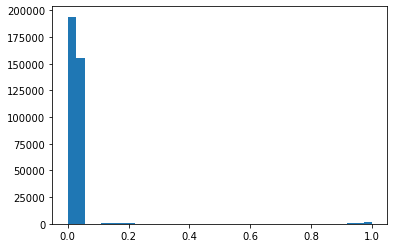

In [18]:
plt.hist(sample_data_0['JC'],bins = int(180/5),range=(0,1))

In [24]:
sample_data_1['AAI'].describe()

count    355064.000000
mean          0.186368
std           8.401742
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4493.926221
Name: AAI, dtype: float64

(array([3.21983e+05, 0.00000e+00, 0.00000e+00, 1.57800e+03, 1.15900e+03,
        1.35300e+03, 7.18000e+02, 1.06600e+03, 3.20000e+02, 1.84000e+02,
        2.58000e+02, 4.58000e+02, 8.30000e+01, 3.70000e+01, 4.13000e+02,
        1.15000e+02, 3.30000e+01, 2.40000e+01, 5.43000e+02, 4.80000e+01,
        1.90000e+01, 1.20000e+01, 9.00000e+02, 1.20000e+01, 7.00000e+00,
        6.00000e+00, 1.12200e+03, 5.00000e+00, 5.00000e+00, 6.39000e+02,
        8.16000e+02, 1.00000e+01, 5.00000e+00, 1.53700e+03, 2.70000e+02,
        9.00000e+00]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

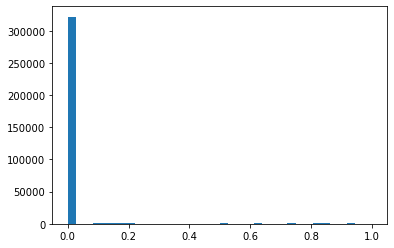

In [26]:
plt.hist(sample_data_1['AAI'],bins = int(180/5),range=(0,1))

In [25]:
sample_data_0['AAI'].describe()

count    355064.000000
mean         15.810110
std          86.012565
min           0.000000
25%           1.651180
50%          12.093427
75%          12.489140
max        5800.389841
Name: AAI, dtype: float64

(array([1.019e+03, 0.000e+00, 0.000e+00, 1.506e+03, 2.650e+02, 0.000e+00,
        4.000e+00, 2.026e+03, 5.100e+01, 1.900e+01, 4.760e+02, 1.551e+03,
        7.600e+01, 4.600e+01, 1.552e+03, 1.026e+03, 1.280e+02, 1.210e+02,
        3.729e+03, 5.670e+02, 1.930e+02, 1.940e+02, 3.983e+03, 3.320e+02,
        3.250e+02, 3.350e+02, 4.349e+03, 4.000e+02, 3.300e+02, 9.440e+02,
        4.343e+03, 5.930e+02, 6.620e+02, 2.306e+03, 3.302e+03, 8.500e+02]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.        ]),
 <a list of 36 Patch objects>)

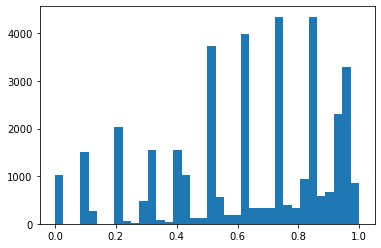

In [27]:
plt.hist(sample_data_0['AAI'],bins = int(180/5),range=(0,1))

In [28]:
sample_data_1['PA'].describe()

count    3.550640e+05
mean     8.205598e+03
std      4.688143e+05
min      1.000000e+00
25%      1.440000e+02
50%      6.740000e+02
75%      2.112000e+03
max      2.266922e+08
Name: PA, dtype: float64

(array([122757.,  42161.,  26889.,  24019.,  15181.,  15123.,  15390.,
          7688.,   7000.,   3318.,   3566.,   3158.,   4043.,   1682.,
          5381.,   1430.,   1479.,    939.,   1287.,   1049.,   5585.,
          6441.,   5940.,    472.,    663.,    515.,   7290.,    247.,
           316.,    307.,    298.,    234.,    320.,    141.,    145.,
           212.]),
 array([1.00000e+00, 2.78750e+02, 5.56500e+02, 8.34250e+02, 1.11200e+03,
        1.38975e+03, 1.66750e+03, 1.94525e+03, 2.22300e+03, 2.50075e+03,
        2.77850e+03, 3.05625e+03, 3.33400e+03, 3.61175e+03, 3.88950e+03,
        4.16725e+03, 4.44500e+03, 4.72275e+03, 5.00050e+03, 5.27825e+03,
        5.55600e+03, 5.83375e+03, 6.11150e+03, 6.38925e+03, 6.66700e+03,
        6.94475e+03, 7.22250e+03, 7.50025e+03, 7.77800e+03, 8.05575e+03,
        8.33350e+03, 8.61125e+03, 8.88900e+03, 9.16675e+03, 9.44450e+03,
        9.72225e+03, 1.00000e+04]),
 <a list of 36 Patch objects>)

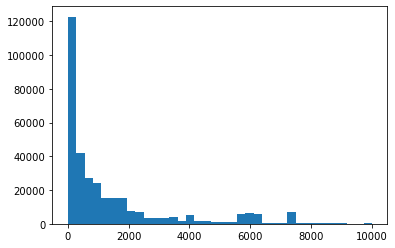

In [30]:
plt.hist(sample_data_1['PA'],bins = int(180/5),range=(1,10000))

In [31]:
sample_data_0['PA'].describe()

count    3.550640e+05
mean     8.757011e+05
std      5.276194e+06
min      1.710000e+03
25%      1.932000e+05
50%      2.127160e+05
75%      4.595770e+05
max      4.820838e+08
Name: PA, dtype: float64

(array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 181.,   0.,   0.,   0., 206.,
          0.,   5.,   6.]),
 array([1.00000e+00, 2.78750e+02, 5.56500e+02, 8.34250e+02, 1.11200e+03,
        1.38975e+03, 1.66750e+03, 1.94525e+03, 2.22300e+03, 2.50075e+03,
        2.77850e+03, 3.05625e+03, 3.33400e+03, 3.61175e+03, 3.88950e+03,
        4.16725e+03, 4.44500e+03, 4.72275e+03, 5.00050e+03, 5.27825e+03,
        5.55600e+03, 5.83375e+03, 6.11150e+03, 6.38925e+03, 6.66700e+03,
        6.94475e+03, 7.22250e+03, 7.50025e+03, 7.77800e+03, 8.05575e+03,
        8.33350e+03, 8.61125e+03, 8.88900e+03, 9.16675e+03, 9.44450e+03,
        9.72225e+03, 1.00000e+04]),
 <a list of 36 Patch objects>)

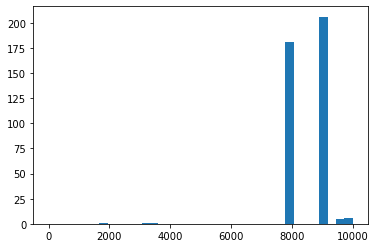

In [32]:
plt.hist(sample_data_0['PA'],bins = int(180/5),range=(1,10000))

In [33]:
sample_data_1['Source_following'].describe()

count    355064.000000
mean          0.062540
std           0.179538
min           0.000034
25%           0.001319
50%           0.008897
75%           0.035690
max           1.000000
Name: Source_following, dtype: float64

(array([2.3992e+05, 5.7508e+04, 1.7036e+04, 0.0000e+00, 4.0480e+03,
        0.0000e+00, 5.4610e+03, 1.2026e+04, 0.0000e+00, 7.4180e+03,
        2.0000e+00, 1.0000e+00, 1.3000e+01, 2.3000e+01, 0.0000e+00,
        5.0000e+00, 2.0000e+00, 6.1000e+01, 2.0000e+01, 1.8400e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1336e+04]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.    

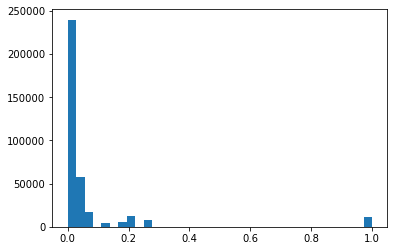

In [36]:
plt.hist(sample_data_1['Source_following'],bins = int(180/5),range=(0,1))

In [35]:
sample_data_0['Source_following'].describe()

count    355064.000000
mean          0.295303
std           0.253540
min           0.000101
25%           0.065697
50%           0.300710
75%           0.484777
max           1.000000
Name: Source_following, dtype: float64

(array([3.00000e+00, 0.00000e+00, 1.59479e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.38300e+03,
        2.12550e+04, 1.11330e+04, 2.35730e+04, 1.28430e+04, 0.00000e+00,
        1.39860e+04, 1.55830e+04, 1.61370e+04, 1.67470e+04, 3.57050e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.02370e+04]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

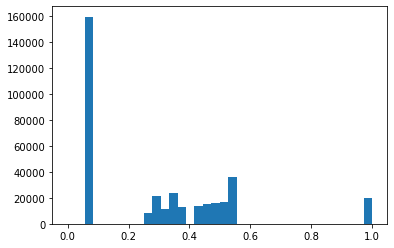

In [37]:
plt.hist(sample_data_0['Source_following'],bins = int(180/5),range=(0,1))

In [38]:
sample_data_1['Sink_follows'].describe()

count    355064.000000
mean          0.031674
std           0.098579
min           0.006623
25%           0.006623
50%           0.006623
75%           0.019868
max           1.000000
Name: Sink_follows, dtype: float64

(array([3.04175e+05, 1.89210e+04, 6.80000e+03, 8.12500e+03, 4.95100e+03,
        2.87700e+03, 1.27400e+03, 6.82000e+02, 1.79000e+02, 3.70000e+02,
        1.87000e+02, 6.00000e+01, 5.10000e+01, 6.70000e+01, 1.60000e+01,
        2.50000e+01, 8.60000e+01, 7.60000e+01, 8.70000e+01, 2.90000e+01,
        1.30000e+01, 5.80000e+01, 7.20000e+01, 1.51100e+03, 1.08400e+03,
        8.78000e+02, 6.25000e+02, 2.61000e+02, 2.89000e+02, 3.13000e+02,
        2.45000e+02, 2.16000e+02, 1.60000e+02, 4.30000e+01, 9.80000e+01,
        1.60000e+02]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

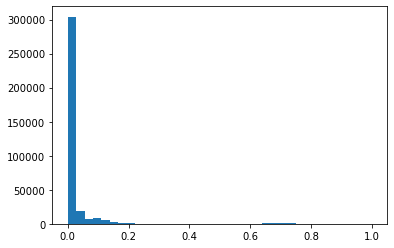

In [41]:
plt.hist(sample_data_1['Sink_follows'],bins = int(180/5),range=(0,1))

In [40]:
sample_data_0['Sink_follows'].describe()

count    355064.000000
mean          0.417673
std           0.286613
min           0.006623
25%           0.086093
50%           0.635762
75%           0.649007
max           1.000000
Name: Sink_follows, dtype: float64

(array([9.02100e+03, 2.39860e+04, 4.80990e+04, 4.74070e+04, 1.09050e+04,
        3.79700e+03, 1.24800e+03, 6.00000e+02, 3.05000e+02, 4.52000e+02,
        2.45000e+02, 4.50000e+02, 1.28000e+02, 3.77000e+02, 4.03000e+02,
        6.99000e+02, 3.57000e+02, 5.03000e+02, 4.25000e+02, 8.49000e+02,
        2.43800e+03, 4.46000e+03, 2.58500e+04, 1.29195e+05, 2.15070e+04,
        9.67000e+03, 4.73000e+03, 1.54500e+03, 1.43300e+03, 1.32700e+03,
        8.84000e+02, 6.64000e+02, 4.44000e+02, 1.11000e+02, 2.20000e+02,
        3.30000e+02]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.

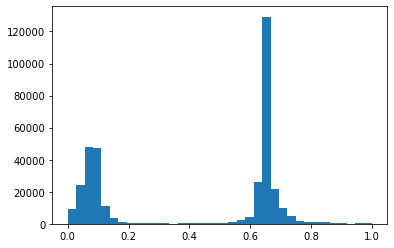

In [42]:
plt.hist(sample_data_0['Sink_follows'],bins = int(180/5),range=(0,1))

In [43]:
sample_data_1['Shortest_path'].describe()

count    355064.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Shortest_path, dtype: float64

In [44]:
sample_data_0['Shortest_path'].describe()

count    355064.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Shortest_path, dtype: float64

In [45]:
sample_data_1['PageRank_Src'].describe()

count    355064.000000
mean          0.000008
std           0.000011
min           0.000004
25%           0.000004
50%           0.000005
75%           0.000007
max           0.000062
Name: PageRank_Src, dtype: float64

(array([2.06751e+05, 4.32580e+04, 2.92650e+04, 1.23830e+04, 1.34880e+04,
        9.59600e+03, 3.07400e+03, 2.92000e+03, 1.80300e+03, 1.11900e+03,
        1.46200e+04, 1.20000e+01, 2.60000e+01, 1.46200e+03, 2.11200e+03,
        3.29000e+02, 0.00000e+00, 3.00000e+00, 1.99000e+02, 2.00000e+00,
        1.24300e+03, 0.00000e+00, 5.40000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.13360e+04]),
 array([3.52173563e-06, 5.14194009e-06, 6.76214454e-06, 8.38234899e-06,
        1.00025534e-05, 1.16227579e-05, 1.32429624e-05, 1.48631668e-05,
        1.64833713e-05, 1.81035757e-05, 1.97237802e-05, 2.13439846e-05,
        2.29641891e-05, 2.45843935e-05, 2.62045980e-05, 2.78248024e-05,
        2.94450069e-05, 3.10652113e-05, 3.26854158e-05, 3.43056202e-05,
        3.59258247e-05, 3.75460291e-05, 3.91662336e-05, 4.07864381e-05,
        4.24066425e-05, 4.40268470

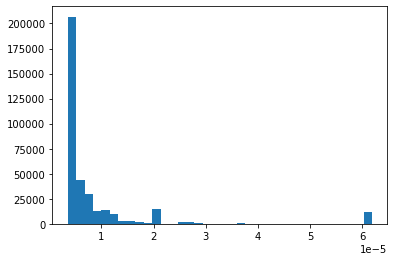

In [48]:
plt.hist(sample_data_1['PageRank_Src'],bins = int(180/5))

In [46]:
sample_data_0['PageRank_Src'].describe()

count    355064.000000
mean          0.000014
std           0.000015
min           0.000004
25%           0.000005
50%           0.000009
75%           0.000017
max           0.000062
Name: PageRank_Src, dtype: float64

(array([95934., 23180., 55210., 26313., 25797., 19396.,  3941.,  7553.,
        20019., 19830.,     0.,     0.,  1926., 10478.,     0.,  1921.,
            0.,     0.,  1939.,     0.,  1927.,     0., 17617.,     0.,
            0.,     0.,  1846.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 20237.]),
 array([3.52173563e-06, 5.14194009e-06, 6.76214454e-06, 8.38234899e-06,
        1.00025534e-05, 1.16227579e-05, 1.32429624e-05, 1.48631668e-05,
        1.64833713e-05, 1.81035757e-05, 1.97237802e-05, 2.13439846e-05,
        2.29641891e-05, 2.45843935e-05, 2.62045980e-05, 2.78248024e-05,
        2.94450069e-05, 3.10652113e-05, 3.26854158e-05, 3.43056202e-05,
        3.59258247e-05, 3.75460291e-05, 3.91662336e-05, 4.07864381e-05,
        4.24066425e-05, 4.40268470e-05, 4.56470514e-05, 4.72672559e-05,
        4.88874603e-05, 5.05076648e-05, 5.21278692e-05, 5.37480737e-05,
        5.53682781e-05, 5.69884826e-05, 5.86086870e-05, 6.02288915e-05,
        6.18490959e-05

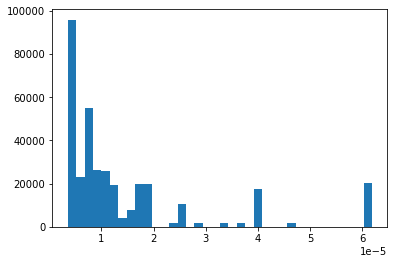

In [49]:
plt.hist(sample_data_0['PageRank_Src'],bins = int(180/5))

In [50]:
sample_data_1['PageRank_Sink'].describe()

count    355064.000000
mean          0.000004
std           0.000002
min           0.000004
25%           0.000004
50%           0.000004
75%           0.000004
max           0.000062
Name: PageRank_Sink, dtype: float64

(array([3.345e+05, 9.876e+03, 3.846e+03, 1.667e+03, 1.089e+03, 8.960e+02,
        4.890e+02, 6.130e+02, 3.510e+02, 1.990e+02, 2.080e+02, 1.220e+02,
        1.480e+02, 1.230e+02, 2.840e+02, 1.620e+02, 0.000e+00, 4.300e+01,
        6.500e+01, 4.100e+01, 7.800e+01, 5.600e+01, 2.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 5.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.600e+01, 7.500e+01]),
 array([3.52184185e-06, 5.14204336e-06, 6.76224486e-06, 8.38244636e-06,
        1.00026479e-05, 1.16228494e-05, 1.32430509e-05, 1.48632524e-05,
        1.64834539e-05, 1.81036554e-05, 1.97238569e-05, 2.13440584e-05,
        2.29642599e-05, 2.45844614e-05, 2.62046629e-05, 2.78248644e-05,
        2.94450659e-05, 3.10652674e-05, 3.26854689e-05, 3.43056704e-05,
        3.59258719e-05, 3.75460734e-05, 3.91662749e-05, 4.07864764e-05,
        4.24066779e-05, 4.40268794e-05, 4.56470809e-05, 4.72672824e-05,
        4.88874839e-05, 5.05076854e-05, 5.21278869

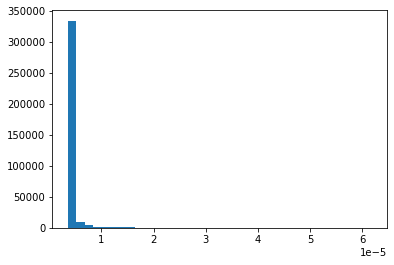

In [52]:
plt.hist(sample_data_1['PageRank_Sink'],bins = int(180/5))

In [51]:
sample_data_0['PageRank_Sink'].describe()

count    355064.000000
mean          0.000005
std           0.000003
min           0.000004
25%           0.000004
50%           0.000004
75%           0.000005
max           0.000062
Name: PageRank_Sink, dtype: float64

(array([2.82165e+05, 2.93230e+04, 2.03850e+04, 7.32100e+03, 3.46800e+03,
        3.62900e+03, 1.61900e+03, 2.26300e+03, 1.15000e+03, 6.18000e+02,
        6.79000e+02, 2.50000e+02, 2.86000e+02, 3.63000e+02, 5.00000e+02,
        4.19000e+02, 0.00000e+00, 1.11000e+02, 1.78000e+02, 1.40000e+01,
        7.90000e+01, 1.30000e+01, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.09000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.09000e+02,
        4.00000e+00]),
 array([3.52184185e-06, 5.14204336e-06, 6.76224486e-06, 8.38244636e-06,
        1.00026479e-05, 1.16228494e-05, 1.32430509e-05, 1.48632524e-05,
        1.64834539e-05, 1.81036554e-05, 1.97238569e-05, 2.13440584e-05,
        2.29642599e-05, 2.45844614e-05, 2.62046629e-05, 2.78248644e-05,
        2.94450659e-05, 3.10652674e-05, 3.26854689e-05, 3.43056704e-05,
        3.59258719e-05, 3.75460734e-05, 3.91662749e-05, 4.07864764e-05,
        4.24066779e-05, 4.40268794

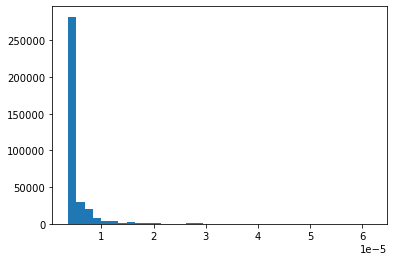

In [53]:
plt.hist(sample_data_0['PageRank_Sink'],bins = int(180/5))

In [54]:
sample_data_1['Centrality_Sour'].describe()

count    3.550640e+05
mean     7.780026e-03
std      9.496101e-03
min      3.538903e-17
25%      1.345339e-03
50%      2.535056e-03
75%      2.154742e-02
max      3.009166e-02
Name: Centrality_Sour, dtype: float64

(array([2.01150e+04, 1.00206e+05, 5.64400e+04, 4.14740e+04, 1.76480e+04,
        5.55900e+03, 9.15200e+03, 1.15050e+04, 3.00000e+00, 3.10000e+01,
        4.60000e+01, 0.00000e+00, 1.28800e+03, 5.00000e+00, 5.00000e+00,
        3.44000e+02, 2.41000e+02, 7.00000e+00, 1.00000e+01, 1.80000e+01,
        1.12000e+02, 3.40000e+01, 1.30000e+01, 7.80000e+01, 7.80000e+01,
        5.65800e+03, 1.60020e+04, 2.56390e+04, 1.30880e+04, 9.56600e+03,
        7.59200e+03, 1.03600e+04, 2.22300e+03, 5.23000e+02, 0.00000e+00,
        1.00000e+00]),
 array([3.53890348e-17, 8.35879405e-04, 1.67175881e-03, 2.50763822e-03,
        3.34351762e-03, 4.17939703e-03, 5.01527643e-03, 5.85115584e-03,
        6.68703524e-03, 7.52291465e-03, 8.35879405e-03, 9.19467346e-03,
        1.00305529e-02, 1.08664323e-02, 1.17023117e-02, 1.25381911e-02,
        1.33740705e-02, 1.42099499e-02, 1.50458293e-02, 1.58817087e-02,
        1.67175881e-02, 1.75534675e-02, 1.83893469e-02, 1.92252263e-02,
        2.00611057e-02, 2.08969851

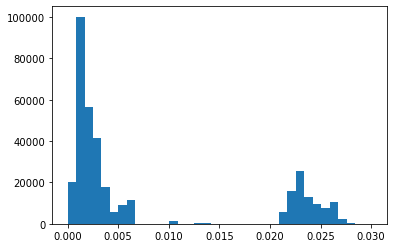

In [56]:
plt.hist(sample_data_1['Centrality_Sour'],bins = int(180/5))

In [55]:
sample_data_0['Centrality_Sour'].describe()

count    3.550640e+05
mean     5.908988e-03
std      4.795343e-03
min      3.538903e-17
25%      2.378972e-03
50%      4.303865e-03
75%      6.593607e-03
max      2.515873e-02
Name: Centrality_Sour, dtype: float64

(array([ 8383., 23620., 41328., 21770., 21869., 45391., 31175., 33448.,
        16331., 27935.,  5781.,  9638.,  9639.,     0.,     0.,  3835.,
         5736.,  3831.,  7553.,  7666.,  1884.,  5596.,  3808.,  1864.,
         3799.,  1905.,  1900.,     0.,  3804.,     0.,  1852.,  1877.,
            0.,     0.,     0.,  1846.]),
 array([3.53890348e-17, 6.98853536e-04, 1.39770707e-03, 2.09656061e-03,
        2.79541414e-03, 3.49426768e-03, 4.19312121e-03, 4.89197475e-03,
        5.59082829e-03, 6.28968182e-03, 6.98853536e-03, 7.68738889e-03,
        8.38624243e-03, 9.08509597e-03, 9.78394950e-03, 1.04828030e-02,
        1.11816566e-02, 1.18805101e-02, 1.25793636e-02, 1.32782172e-02,
        1.39770707e-02, 1.46759243e-02, 1.53747778e-02, 1.60736313e-02,
        1.67724849e-02, 1.74713384e-02, 1.81701919e-02, 1.88690455e-02,
        1.95678990e-02, 2.02667525e-02, 2.09656061e-02, 2.16644596e-02,
        2.23633131e-02, 2.30621667e-02, 2.37610202e-02, 2.44598738e-02,
        2.51587273e-02

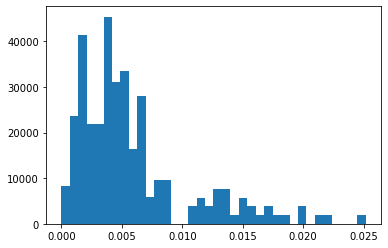

In [57]:
plt.hist(sample_data_0['Centrality_Sour'],bins = int(180/5))

In [58]:
sample_data_1['Centrality_Sink'].describe()

count    3.550640e+05
mean     8.647115e-04
std      3.015016e-03
min      3.538903e-16
25%      5.809327e-05
50%      1.760344e-04
75%      7.062701e-04
max      3.009166e-02
Name: Centrality_Sink, dtype: float64

(array([2.98073e+05, 3.46470e+04, 1.04450e+04, 3.55800e+03, 1.17300e+03,
        5.30000e+02, 1.87000e+02, 1.42000e+02, 6.10000e+01, 6.60000e+01,
        3.70000e+01, 0.00000e+00, 6.60000e+01, 2.40000e+01, 2.00000e+00,
        4.40000e+01, 4.50000e+01, 2.00000e+01, 1.00000e+00, 3.00000e+00,
        0.00000e+00, 3.00000e+00, 2.00000e+00, 1.20000e+01, 3.40000e+01,
        4.30000e+02, 1.87500e+03, 1.43300e+03, 7.61000e+02, 5.03000e+02,
        3.79000e+02, 3.30000e+02, 8.20000e+01, 6.90000e+01, 0.00000e+00,
        2.70000e+01]),
 array([3.53890348e-16, 8.35879405e-04, 1.67175881e-03, 2.50763822e-03,
        3.34351762e-03, 4.17939703e-03, 5.01527643e-03, 5.85115584e-03,
        6.68703524e-03, 7.52291465e-03, 8.35879405e-03, 9.19467346e-03,
        1.00305529e-02, 1.08664323e-02, 1.17023117e-02, 1.25381911e-02,
        1.33740705e-02, 1.42099499e-02, 1.50458293e-02, 1.58817087e-02,
        1.67175881e-02, 1.75534675e-02, 1.83893469e-02, 1.92252263e-02,
        2.00611057e-02, 2.08969851

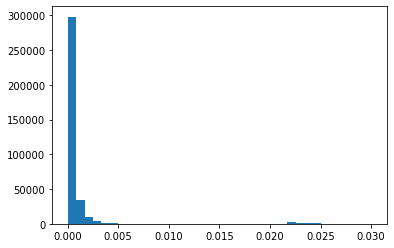

In [60]:
plt.hist(sample_data_1['Centrality_Sink'],bins = int(180/5))

In [61]:
sample_data_0['Centrality_Sink'].describe()

count    3.550640e+05
mean     1.332694e-02
std      1.025843e-02
min      3.538903e-16
25%      1.184472e-03
50%      2.149581e-02
75%      2.178813e-02
max      3.009166e-02
Name: Centrality_Sink, dtype: float64

(array([36351., 85222., 18148.,  4291.,  1236.,   827.,   380.,   254.,
          272.,   290.,   502.,     0.,   179.,   291.,   176.,   490.,
          249.,   410.,   456.,   469.,   446.,   438.,  1514.,  2277.,
         4912., 88309., 70923., 20863.,  7486.,  3647.,  1658.,  1434.,
          332.,   221.,     0.,   111.]),
 array([3.53890348e-16, 8.35879405e-04, 1.67175881e-03, 2.50763822e-03,
        3.34351762e-03, 4.17939703e-03, 5.01527643e-03, 5.85115584e-03,
        6.68703524e-03, 7.52291465e-03, 8.35879405e-03, 9.19467346e-03,
        1.00305529e-02, 1.08664323e-02, 1.17023117e-02, 1.25381911e-02,
        1.33740705e-02, 1.42099499e-02, 1.50458293e-02, 1.58817087e-02,
        1.67175881e-02, 1.75534675e-02, 1.83893469e-02, 1.92252263e-02,
        2.00611057e-02, 2.08969851e-02, 2.17328645e-02, 2.25687439e-02,
        2.34046233e-02, 2.42405027e-02, 2.50763822e-02, 2.59122616e-02,
        2.67481410e-02, 2.75840204e-02, 2.84198998e-02, 2.92557792e-02,
        3.00916586e-02

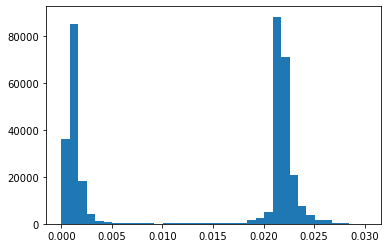

In [62]:
plt.hist(sample_data_0['Centrality_Sink'],bins = int(180/5))